# import des package et donnees 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.spatial.distance import cdist
from math import pi

In [2]:
df = pd.read_csv("/kaggle/input/client-cluster/Live.csv")

In [3]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## Analyse de la base de données 'Live'

La base de données 'Live' contient des informations collectées auprès de vendeurs sur Facebook en Thaïlande. Elle comprend différents types de statuts (photo, vidéo, etc.) ainsi que diverses métriques telles que les 'likes', 'shares', et 'comments'. Les détails précis des variables peuvent varier en fonction du fichier de données spécifique utilisé.

La base de données contient les inforamtions suivantes: 
- `status_id` : L'ID unique de chaque publication.
- `status_type` : Le type de publication (par exemple, photo, statut, lien, vidéo).
- `status_published` : La date et l'heure de la publication.
- `num_reactions` : Le nombre total de réactions à la publication (par exemple, likes, love, wow, haha, sad, angry).
- `num_comments` : Le nombre total de commentaires sur la publication.
- `num_shares` : Le nombre total de partages de la publication.
- `num_likes` : Le nombre total de "J'aime" pour la publication.
- `num_loves` : Le nombre total de "Love" réactions pour la publication.
- `num_wows` : Le nombre total de "Wow" réactions pour la publication.
- `num_hahas` : Le nombre total de "Haha" réactions pour la publication.
- `num_sads` : Le nombre total de "Sad" réactions pour la publication.
- `num_angrys` : Le nombre total de "Angry" réactions pour la publication.
- `ColumnX` : Description de la colonne X (à répéter pour toutes les autres colonnes)


L'objectif de cette analyse est **de découvrir des modèles et des tendances dans les données qui peuvent nous aider à comprendre comment les utilisateurs de Facebook en Thaïlande** interagissent avec les publications des vendeurs en ligne. 
Ces informations peuvent être utilisées pour optimiser la stratégie de contenu des vendeurs, améliorer l'engagement des utilisateurs et, finalement, augmenter les ventes.


In [4]:
# Suppression des colonnes 
df = df.drop(['Column1', 'Column2', 'Column3', 'Column4','status_published'], axis=1)
df.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0


In [5]:
# Mettre l'index 
df = df.set_index('status_id')
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_id,,,,,,,,,,
246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0
246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0
246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0
246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0
246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1050855161656896_1061863470556065,photo,89,0,0,89,0,0,0,0,0
1050855161656896_1061334757275603,photo,16,0,0,14,1,0,1,0,0
1050855161656896_1060126464063099,photo,2,0,0,1,1,0,0,0,0


# 0-Analyse des valeurs manquantes

In [6]:
# Vérification des données manquantes
df.isnull().sum()

status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

# 1-Analyse Descriptive univariees

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7050 entries, 246675545449582_1649696485147474 to 1050855161656896_1050858841656528
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 605.9+ KB


In [8]:
# description du dataset
df.describe(include='all')

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
unique,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,photo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,NaN,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
# separation des variables
variables_cathegorielles=df.select_dtypes("object")
variables_numeriques=df.select_dtypes(["float64","int64"])

### distribution des variables 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


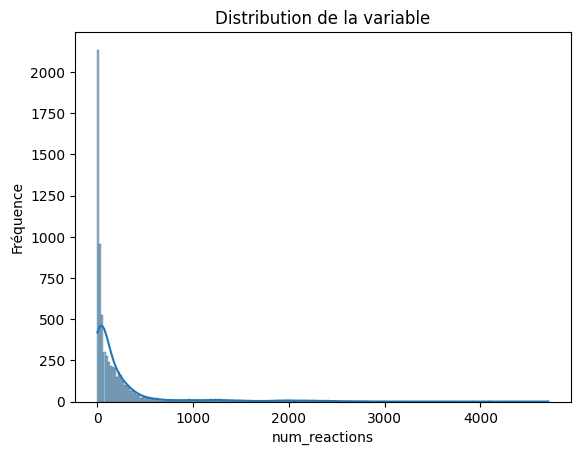

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


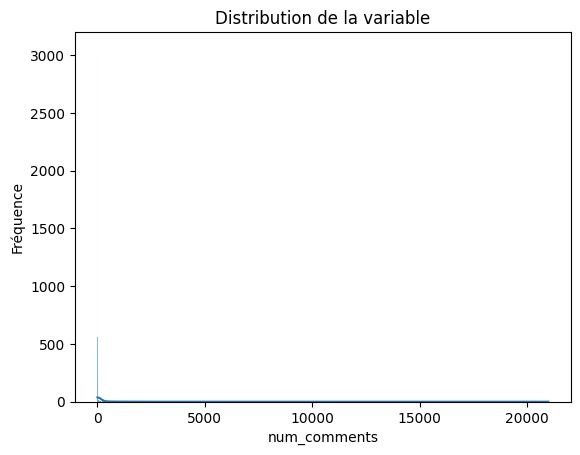

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


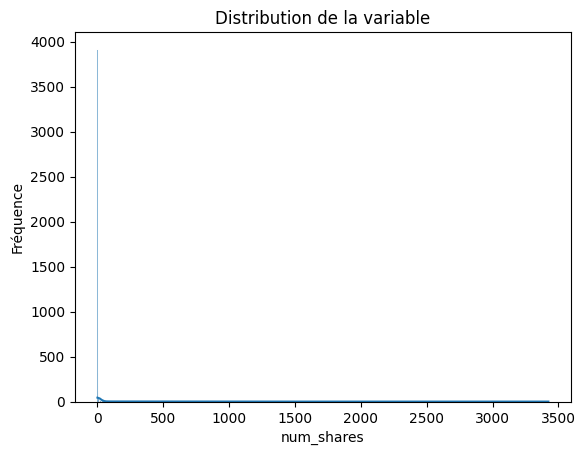

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


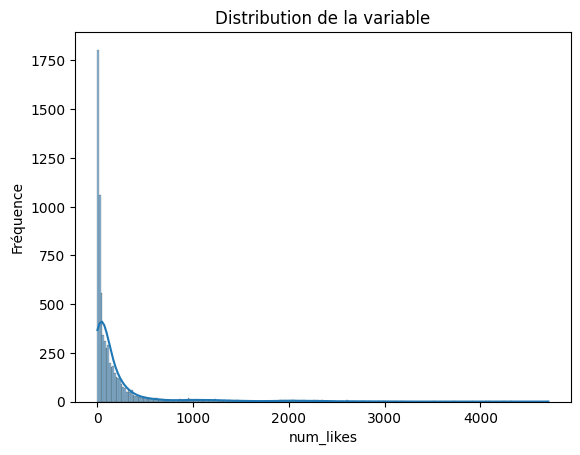

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


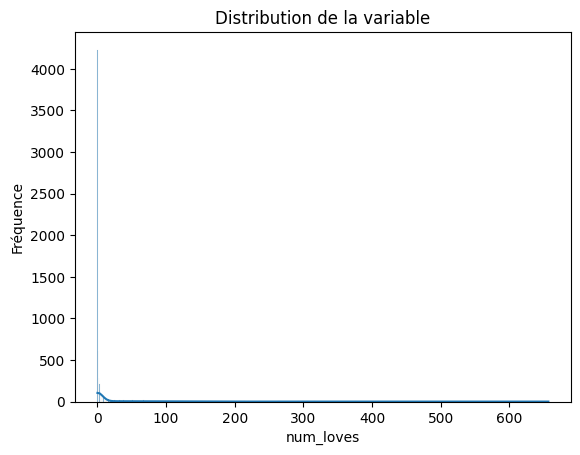

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


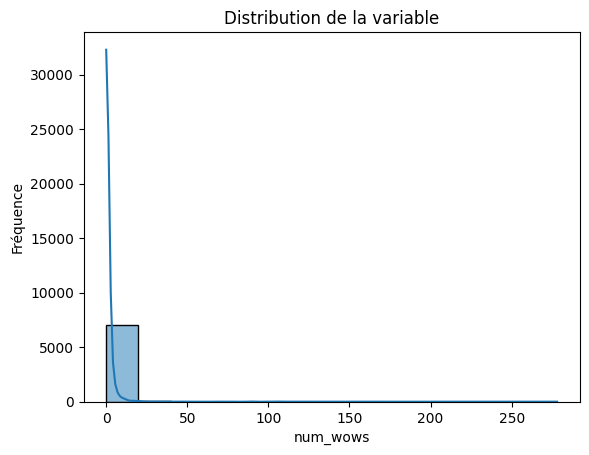

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


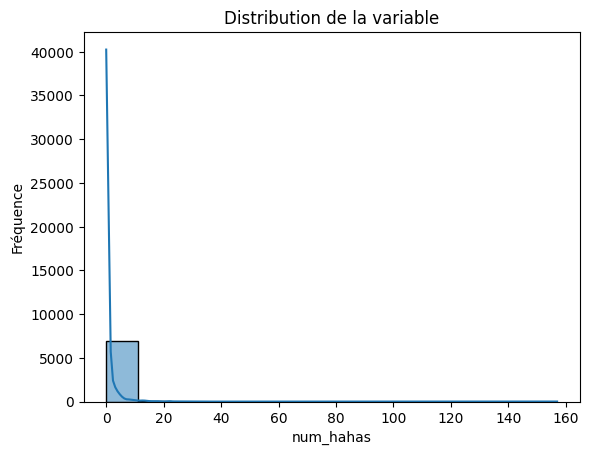

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


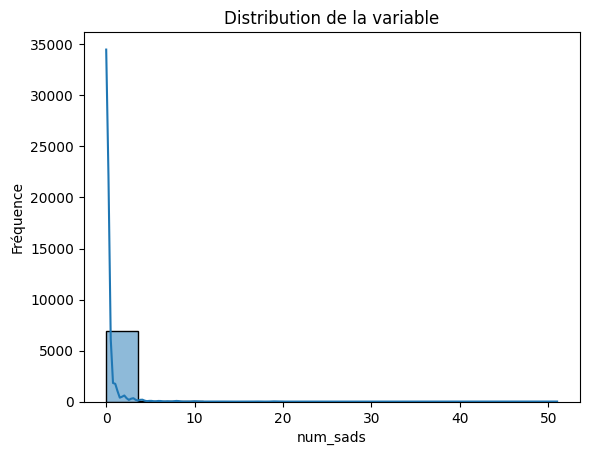

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


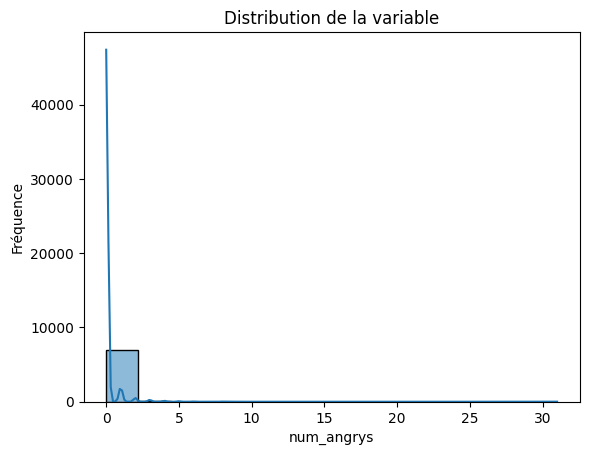

In [10]:
# variables quantitatives
# Histogramme
for i in variables_numeriques:
    sns.histplot(df[i], kde=True)
    plt.title("Distribution de la variable")
    plt.xlabel(i)
    plt.ylabel("Fréquence")
    plt.show()

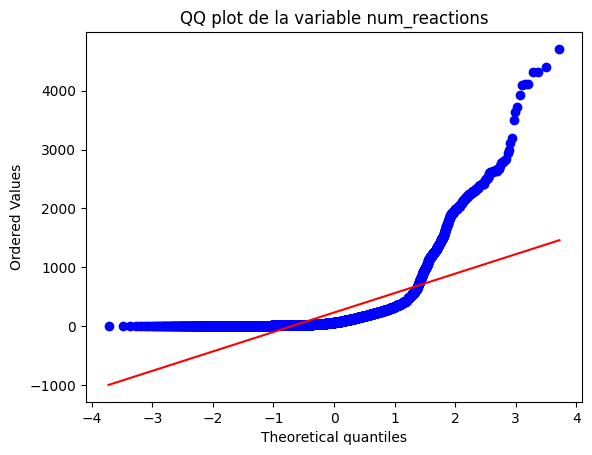

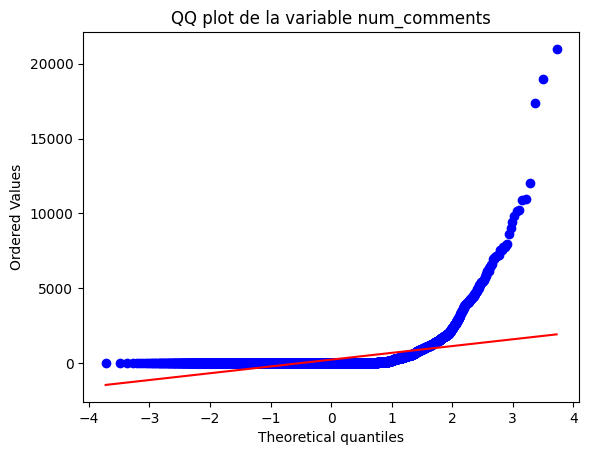

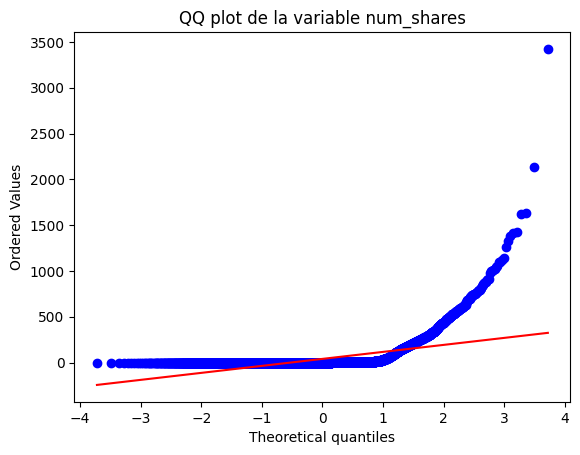

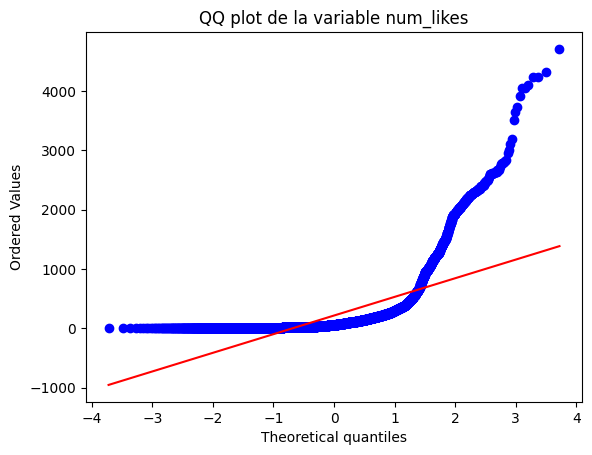

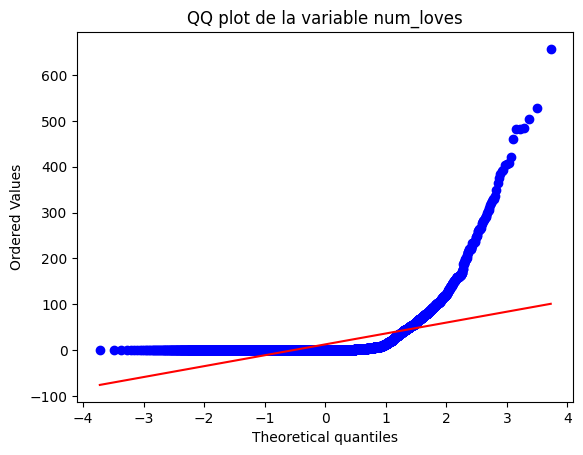

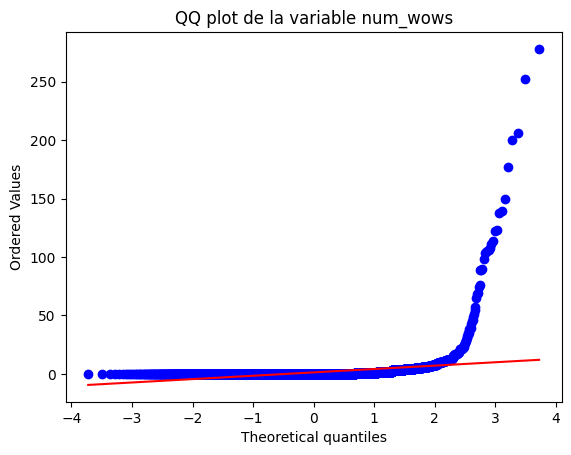

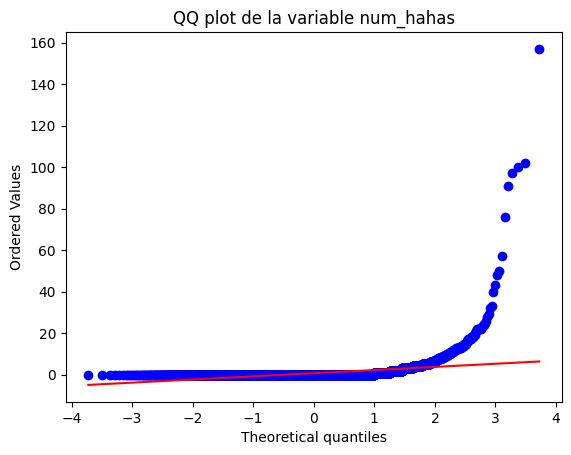

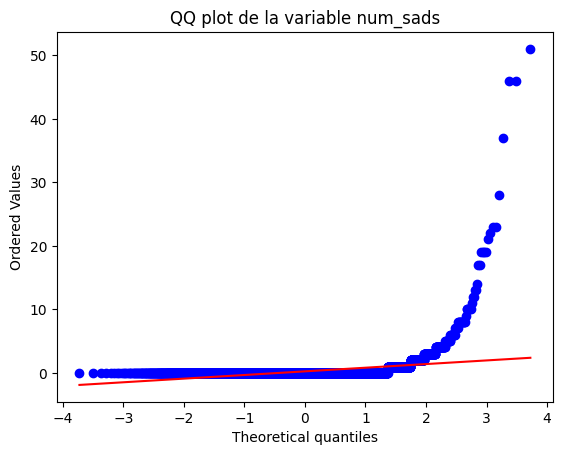

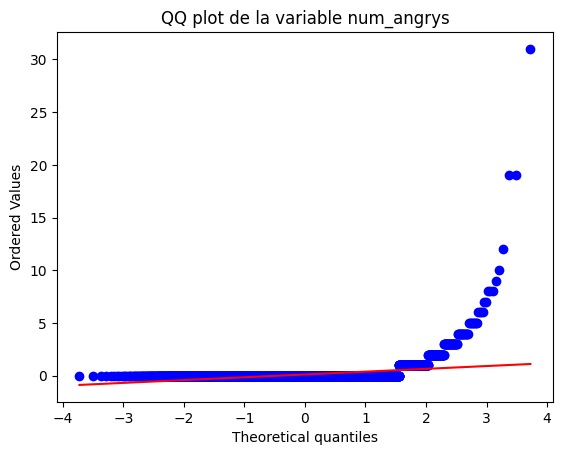

In [11]:
from scipy import stats
for i in variables_numeriques:
    stats.probplot(df[i],plot=plt)
    plt.title(f"QQ plot de la variable {i}")
    plt.show()

### Observations: 
les variables semblent ne pas etre sur la meme echelle  (standartisation/Normalisation) .
les variables semblent etre anormalement distribuee donc une *Transforamtion* sera necessaire

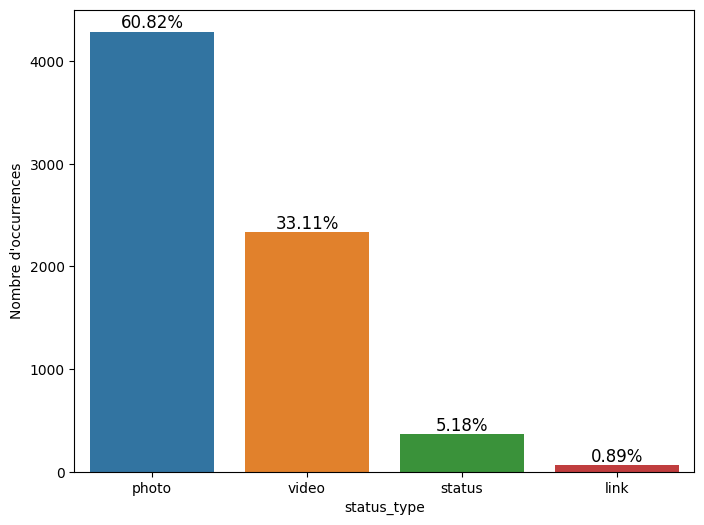

In [12]:
# variables cathegoriels
# Graphique en barres pour la fréquence de chaque catégorie
for i in variables_cathegorielles:
    # Calcul des proportions
    total = len(df)
    proportions = df[i].value_counts(normalize=True) * 100

    # Affichage du countplot
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=i, data=df, order=df[i].value_counts().index)

    # Ajouter les proportions sur les barres
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.2f}%'  # Calcul des pourcentages
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=12)

    plt.xlabel(i)
    plt.ylabel('Nombre d\'occurrences')
    plt.show()

# 2-Analyses bivariees

## 2-1-Analyse des liaison entre variables quantitatives

In [13]:
# sns.pairplot(df,kind="scatter")

<Axes: >

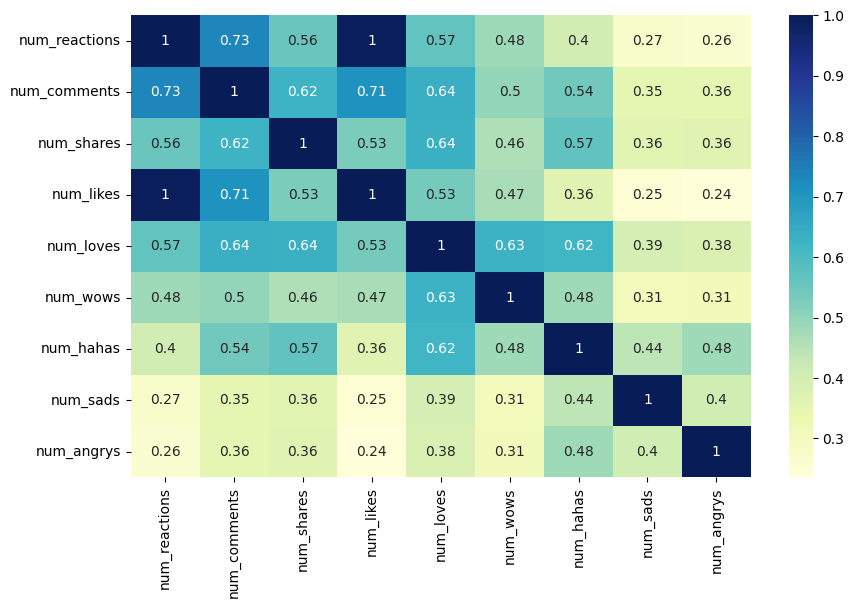

In [14]:
plt.figure(figsize=(10, 6))
num=df.select_dtypes(include=[np.number])
sns.heatmap(num.corr(method='spearman'), cmap='YlGnBu',annot=True)

In [15]:
from scipy.stats import shapiro, pearsonr, spearmanr, kendalltau
variables_correlees=[]
for i in variables_numeriques:
    for j in variables_numeriques:
        if(i!=j):
            # Corrélation de spearman
            stat,p_value=spearmanr(df[i], df[j])
            if p_value < 0.05 and (j,i) not in variables_correlees:
                variables_correlees.append((i,j))

In [16]:
print("variables correlees:\n")
var_cor=pd.DataFrame({"variables correlees":variables_correlees})
var_cor

variables correlees:



,variables correlees
0,"(num_reactions, num_comments)"
1,"(num_reactions, num_shares)"
2,"(num_reactions, num_likes)"
3,"(num_reactions, num_loves)"
4,"(num_reactions, num_wows)"
5,"(num_reactions, num_hahas)"
6,"(num_reactions, num_sads)"
7,"(num_reactions, num_angrys)"
8,"(num_comments, num_shares)"
9,"(num_comments, num_likes)"


In [17]:
corr=variables_numeriques.corr()
corr_pos=[]
for i in variables_numeriques:
    for j in variables_numeriques:
        if (i!=j) and (corr.loc[i,j]>=0.5 or corr.loc[i,j]<=-0.5) and (j,i) not in corr_pos :
            corr_pos.append((i,j))
corr_pos

[('num_reactions', 'num_likes'),
 ('num_comments', 'num_shares'),
 ('num_comments', 'num_loves'),
 ('num_shares', 'num_loves'),
 ('num_loves', 'num_wows'),
 ('num_loves', 'num_hahas')]

## 2-2-Analyse de la liaison entre une variable qualitative et une variable quantitative

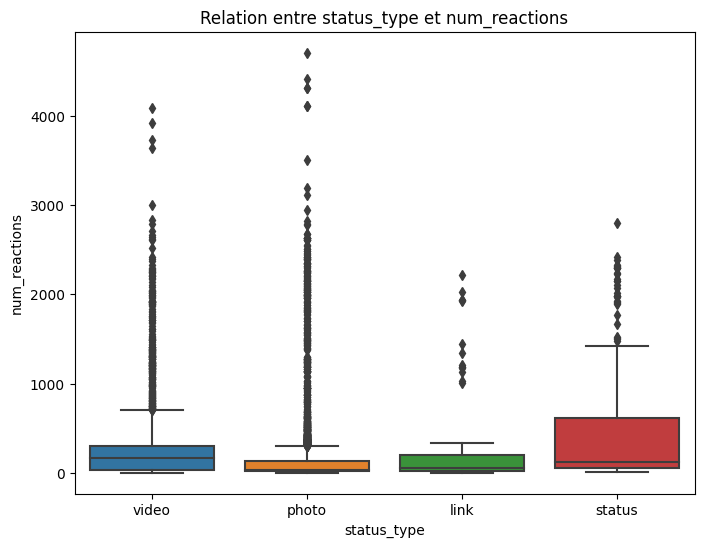

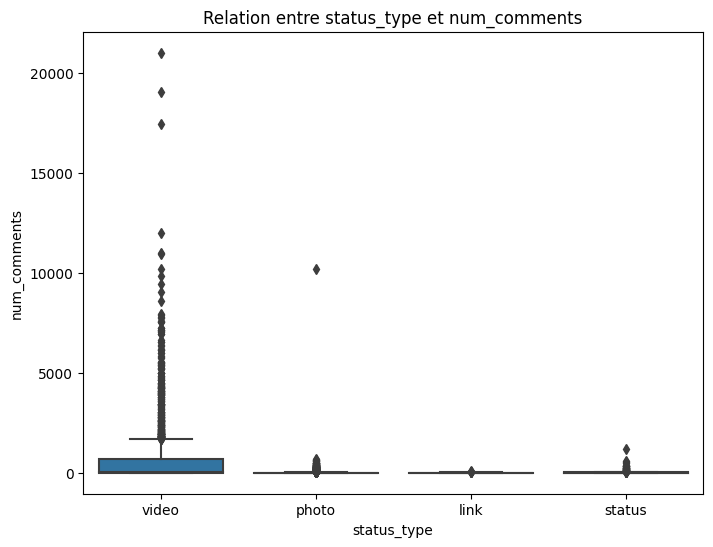

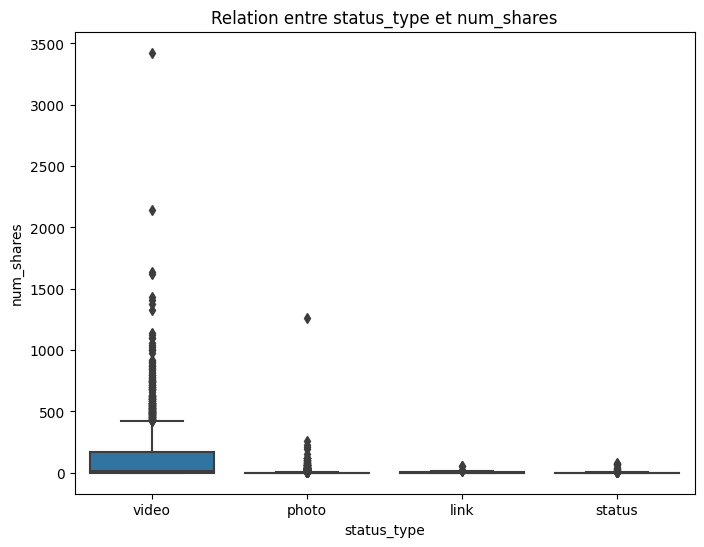

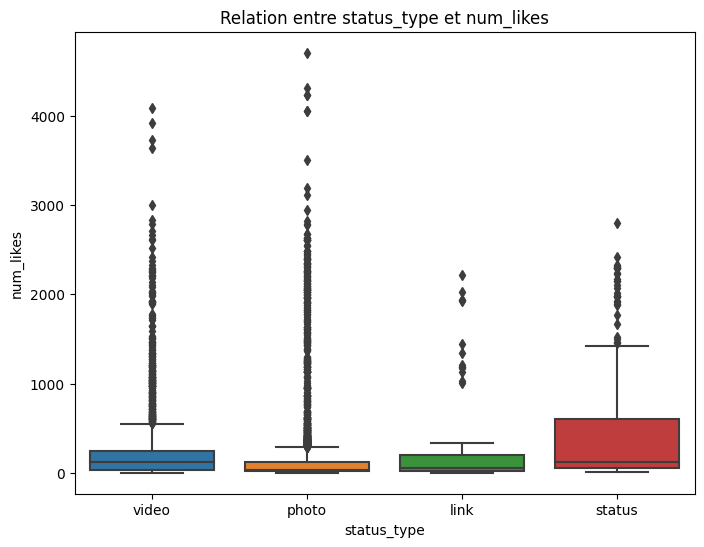

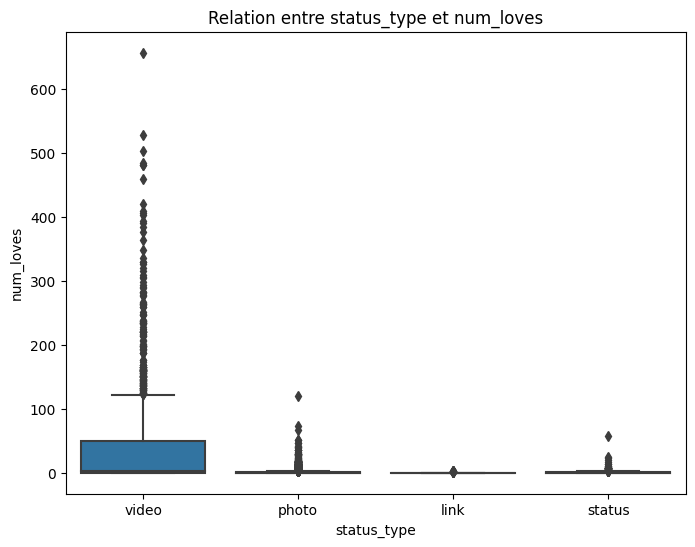

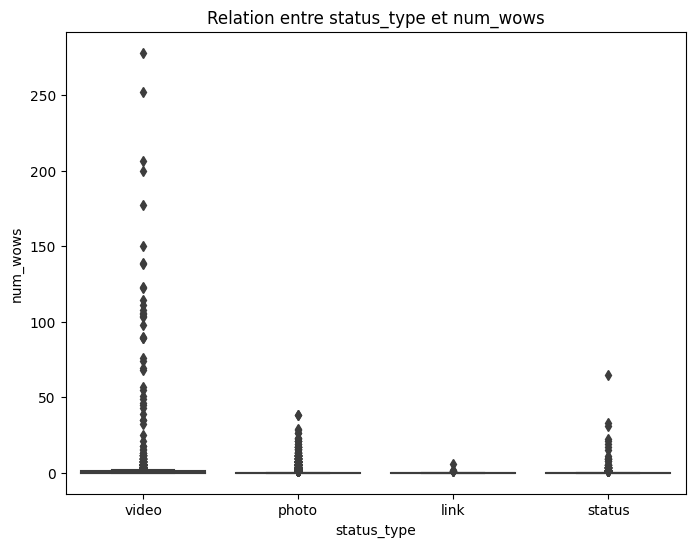

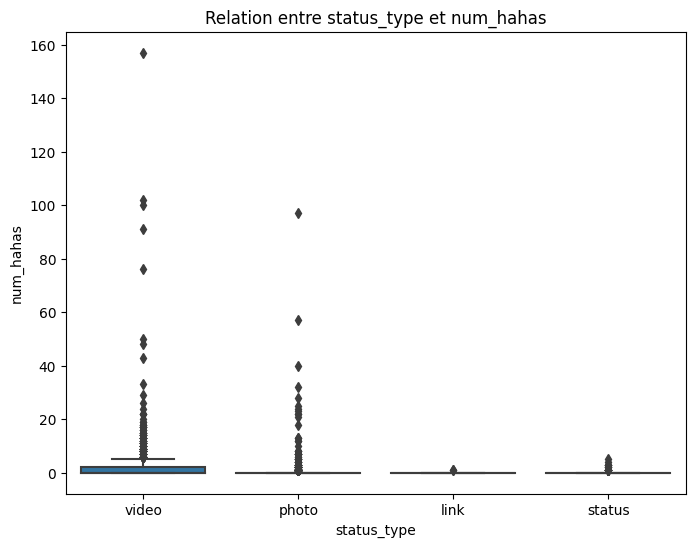

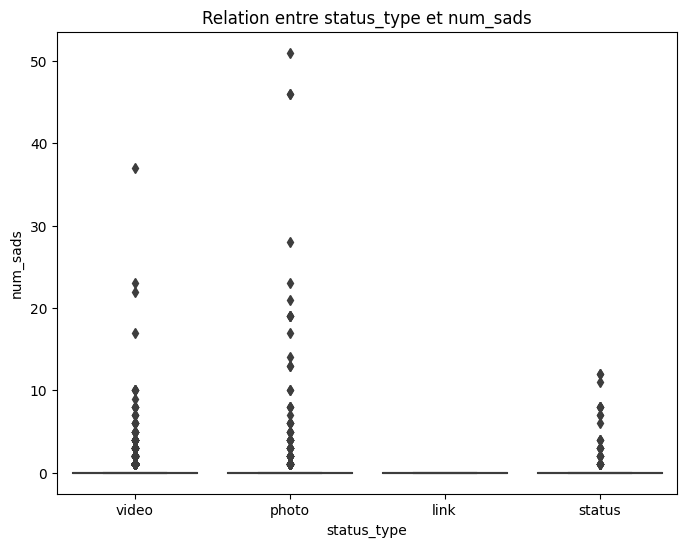

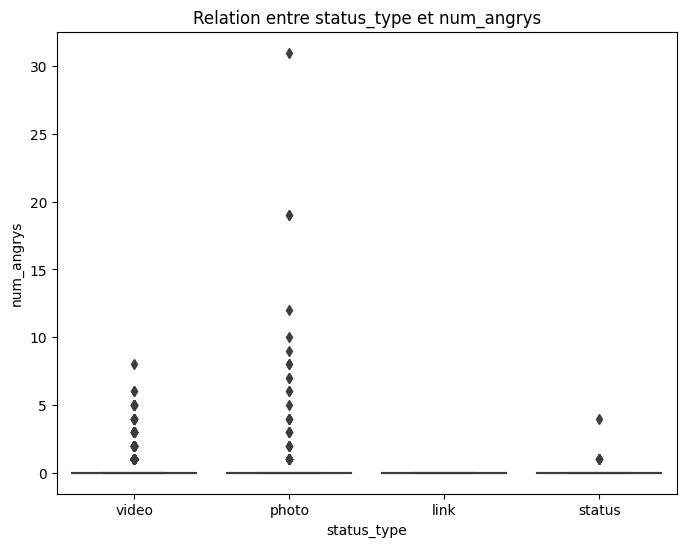

In [18]:
cpt=[]
for i in variables_cathegorielles:
    for j in variables_numeriques:
        if(i!=j) and (j,i) not in cpt:
            plt.figure(figsize=(8, 6))
            sns.boxplot(data=df, x=i, y=j)
            plt.xlabel(i)
            plt.ylabel(j)
            plt.title(f'Relation entre {i} et {j}')
            plt.show()
            cpt.append((i,j))

In [19]:
# test de kruskal wallis pour verifier la relation entre les variables numeriques et les variables cathegorielles du dataset
from scipy.stats import shapiro, ttest_ind, f_oneway, mannwhitneyu, kruskal
var_liees2 = []

# Boucle sur les variables catégorielles et numériques
for i in df.select_dtypes('object').columns:
    cat = df[i].value_counts()
    for j in df.select_dtypes(['int64','float64']).columns:
        # Création des classes en fonction du nombre de catégories
        classes = [df[df[i] == cat.index[k]][j] for k in range(cat.shape[0])]

        # Test de Kruskal-Wallis
        kruskal_stat, kruskal_p_value = kruskal(*classes)

        # Vérification de la p-value
        if kruskal_p_value < 0.05 and (j, i) not in var_liees2:
            var_liees2.append((i, j))

In [20]:
print(" il existe une relation significative entre les variables suivantes:\n")
var_liees2

 il existe une relation significative entre les variables suivantes:



[('status_type', 'num_reactions'),
 ('status_type', 'num_comments'),
 ('status_type', 'num_shares'),
 ('status_type', 'num_likes'),
 ('status_type', 'num_loves'),
 ('status_type', 'num_wows'),
 ('status_type', 'num_hahas'),
 ('status_type', 'num_sads'),
 ('status_type', 'num_angrys')]

# 4-Analyse des valeurs extremes et aberrantes

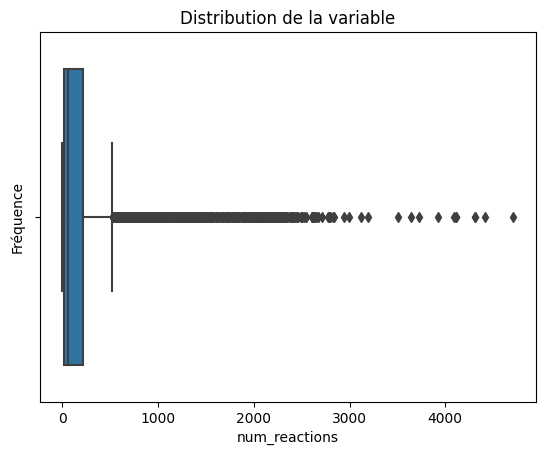

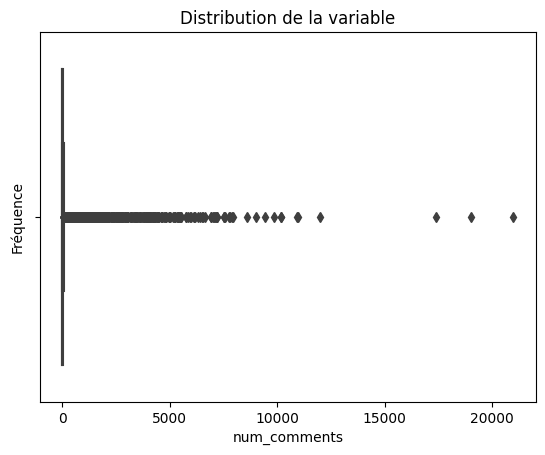

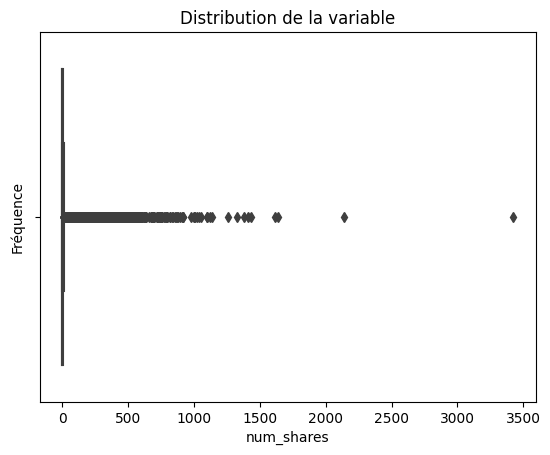

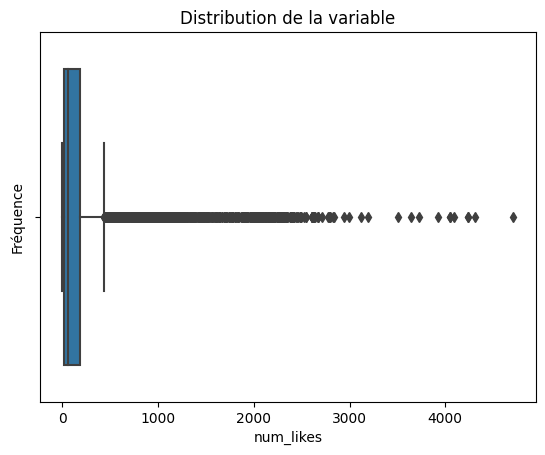

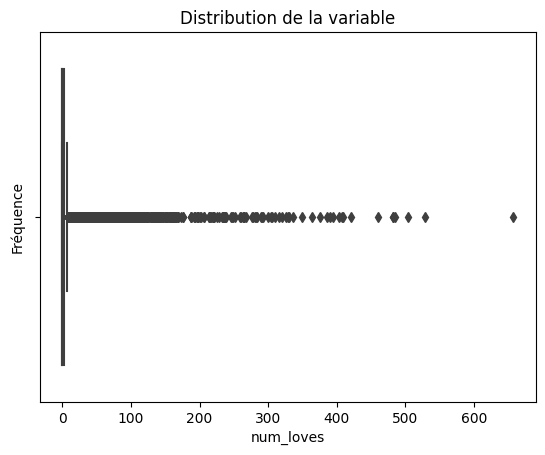

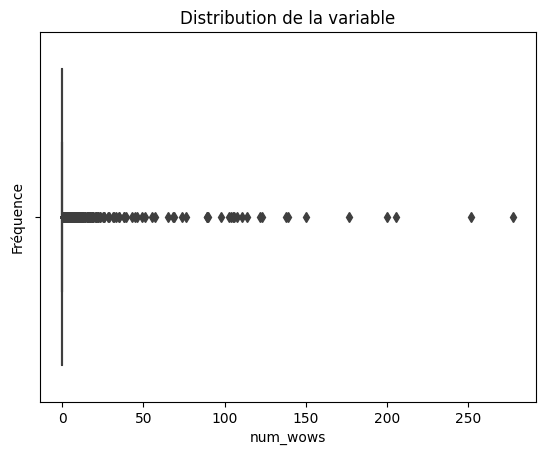

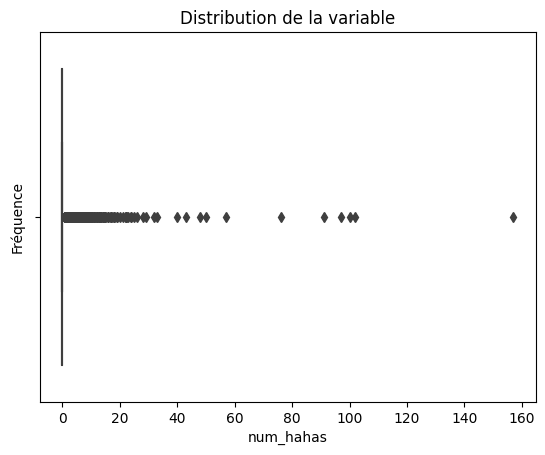

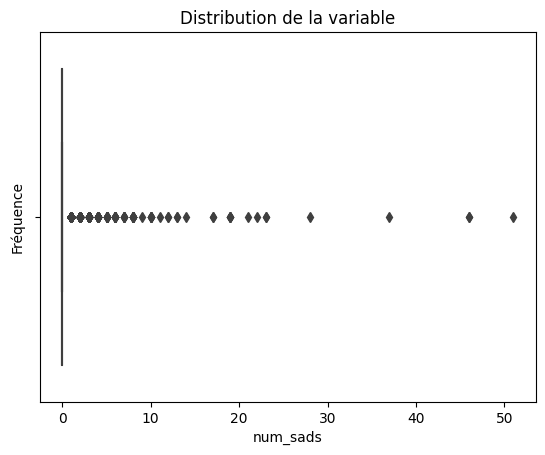

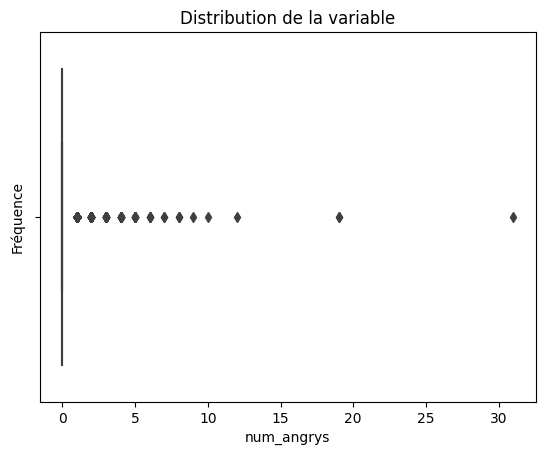

In [21]:
# Analyses graphiques pour les valeurs extremes
# variables quantitatives
# Histogramme
for i in variables_numeriques:
    sns.boxplot(x=df[i])
    plt.title("Distribution de la variable")
    plt.xlabel(i)
    plt.ylabel("Fréquence")
    plt.show()

# 5-Analyses multivariees : ACP

In [22]:
 # Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])

# Normaliser les données
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_numeric)

# ACP
pca = PCA()
df_pca = pca.fit_transform(df_normalized)

## Identifier le nombre d'axes factoriels

In [23]:
# Analyse des valeurs propres
comp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(9)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
comp

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,3.449886e+00,38.0,38.0
1,Dim2,1.736328e+00,19.0,58.0
2,Dim3,9.650638e-01,11.0,68.0
3,Dim4,8.348892e-01,9.0,78.0
4,Dim5,7.927609e-01,9.0,86.0
5,Dim6,6.926098e-01,8.0,94.0
6,Dim7,3.804573e-01,4.0,98.0
7,Dim8,1.492820e-01,2.0,100.0
8,Dim9,1.648416e-08,0.0,100.0


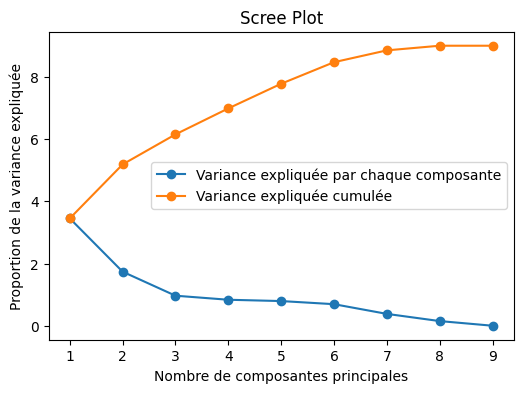

In [24]:
# Identifier le nombre d'axe factoriel

# Calculer la variance expliquée cumulée
explained_variance = pca.explained_variance_

cumulative_explained_variance = np.cumsum(explained_variance)

# Créer un scree plot avec la variance expliquée cumulée
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'o-', label='Variance expliquée par chaque composante')
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, 'o-', label='Variance expliquée cumulée')
plt.title('Scree Plot')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Proportion de la variance expliquée')
plt.legend()
plt.show()

### Nombre d'axe factoriel ideal: entre 2 et 3

In [25]:
# Calcul du cosinus carré des variables
cos_squared = np.square(pca.components_)

# Création d'un dataframe pandas avec le cosinus carré des variables
df_cos_squared = pd.DataFrame(cos_squared, columns=['PC{}'.format(i+1) for i in range(df_numeric.shape[1])])
df_cos_squared.index = df.columns[:-1]

print(df_cos_squared)

                    PC1           PC2           PC3       PC4       PC5  \
status_type    0.095526  1.221280e-01  2.011686e-01  0.071026  0.219934   
num_reactions  0.380586  5.873276e-02  4.580901e-02  0.425548  0.030379   
num_comments   0.005976  5.255476e-02  3.404843e-03  0.009966  0.022346   
num_shares     0.000217  1.307223e-01  3.401271e-02  0.000220  0.001421   
num_likes      0.003973  1.851801e-01  2.996664e-02  0.006528  0.000125   
num_loves      0.000772  1.642115e-02  5.930161e-02  0.001267  0.007758   
num_wows       0.000182  4.065010e-01  1.582390e-01  0.000403  0.232731   
num_hahas      0.000437  2.775977e-02  4.680976e-01  0.001428  0.481477   
num_sads       0.512331  1.118664e-12  3.096588e-10  0.483614  0.003828   

                    PC6       PC7       PC8       PC9  
status_type    0.098365  0.102473  0.028601  0.060779  
num_reactions  0.000055  0.022767  0.017082  0.019042  
num_comments   0.194184  0.027529  0.678924  0.005117  
num_shares     0.013511  

In [26]:
# # Contribution à la formation de l'axe
# # Obtenir les composantes principales
components = pca.components_

n_components = df_numeric.shape[1]
feature_names=df.columns[0:9]
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contributions, columns=column_names, index=feature_names)

print(variable_contrib_df)

               PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib  \
status_type       0.329554     0.660821     0.005767     0.000181   
num_reactions     0.421328     0.101979     0.050719     0.109139   
num_comments      0.694009     0.079539     0.003286     0.028397   
num_shares        0.245030     0.738891     0.009618     0.000184   
num_likes         0.758749     0.052748     0.021566     0.001187   
num_loves         0.339347     0.000096     0.187400     0.011280   
num_wows          0.353519     0.039530     0.026567     0.007842   
num_hahas         0.098669     0.029659     0.655205     0.001962   
num_sads          0.209682     0.033063     0.004938     0.674718   

               PC5_contrib  PC6_contrib  PC7_contrib  PC8_contrib  \
status_type       0.003149     0.000535     0.000069     0.000065   
num_reactions     0.146804     0.011373     0.154656     0.004144   
num_comments      0.023756     0.041073     0.060203     0.069879   
num_shares        0.005175     0.

## Representation graphique de l'ACP

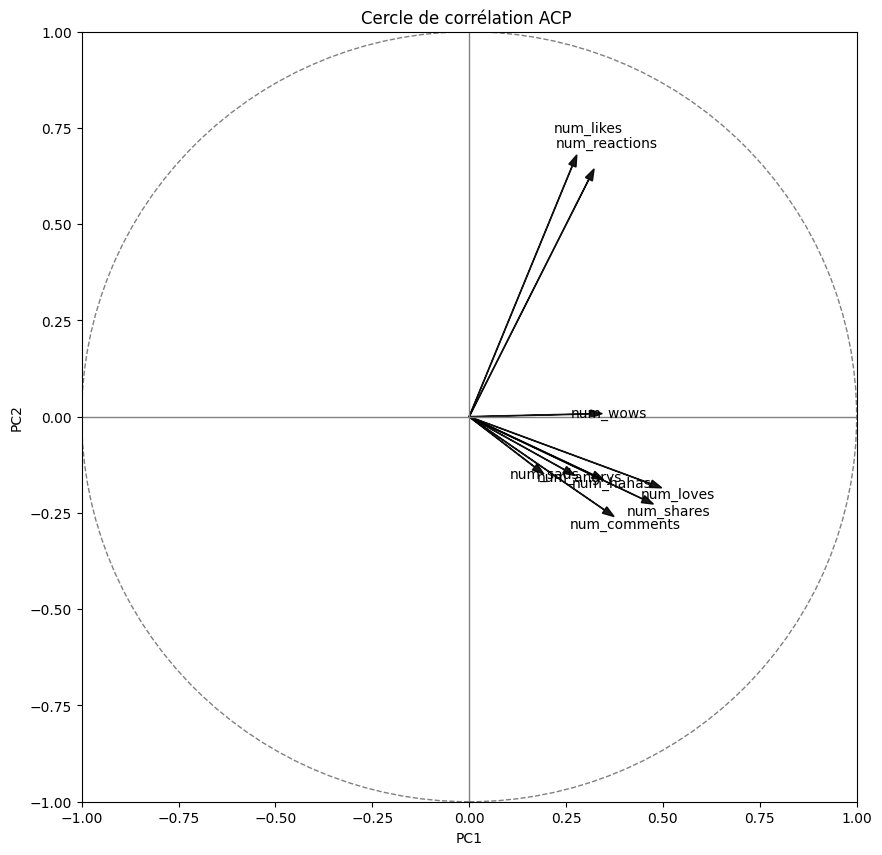

In [27]:


# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

# Créer la figure
plt.figure(figsize=(10, 10))

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, df_numeric.columns[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP ')

# Afficher la figure
plt.show()


In [28]:
df_pca.shape

(7050, 9)

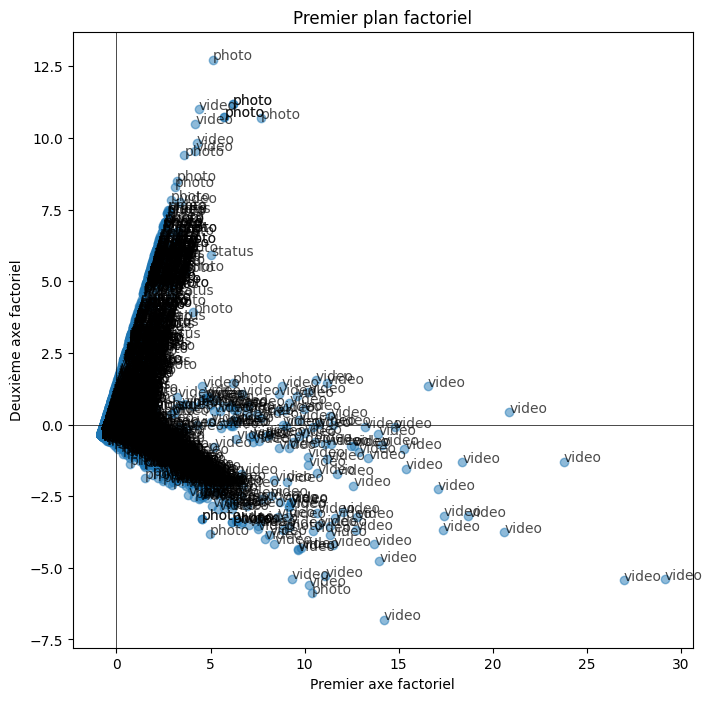

In [29]:
# Premier plan factoriel
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5)

# Ajouter des étiquettes pour chaque point (type de publication)
for i, status_type in enumerate(df['status_type']):
    ax.annotate(status_type, (df_pca[i, 0], df_pca[i, 1]), alpha=0.7)

# Ajouter des axes
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

# Labels des axes
ax.set_xlabel('Premier axe factoriel')
ax.set_ylabel('Deuxième axe factoriel')

# Titre du graphique
plt.title('Premier plan factoriel')

# Afficher le graphique
plt.show()

# 6-Détermination des clusters avec les Kmeans

In [30]:
# Choix du nombre optimal de clusters (méthode du coude et du score de silhouette)
inertias = []
silhouettes = []
K = range(2, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(df_normalized)
    inertias.append(kmeanModel.inertia_)
    silhouettes.append(silhouette_score(df_normalized, kmeanModel.labels_))

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

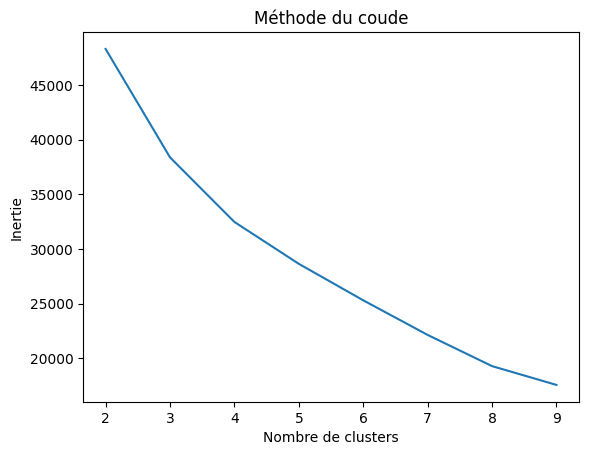

In [31]:
# Tracer la courbe de l'inertie en fonction du nombre de clusters
plt.plot(range(2, 10), inertias)
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()


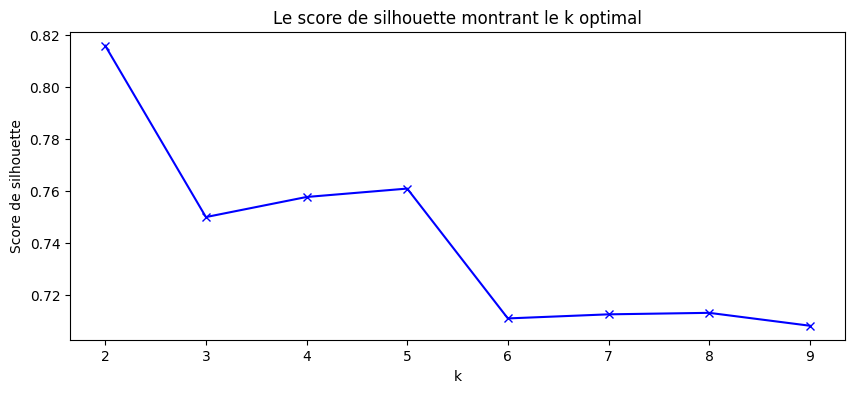

In [32]:
# Graphique du score de silhouette
plt.figure(figsize=(10,4))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('Score de silhouette')
plt.title('Le score de silhouette montrant le k optimal')
plt.show()

### Nombre de cluster ideal: entre 3 et 4

In [33]:
# Appliquer KMeans avec le nombre de clusters optimal trouvé (supposons que c'est 3 pour cet exemple)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_normalized)



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [34]:
silhouette_score(df_normalized, kmeans.labels_)

0.7577030782310119

In [35]:
# Ajouter les labels de cluster au DataFrame
df['cluster_label'] = kmeans.labels_
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster_label
status_id,,,,,,,,,,,
246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0,0
246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0,0
246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0,0
246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0,0
246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1050855161656896_1061863470556065,photo,89,0,0,89,0,0,0,0,0,0
1050855161656896_1061334757275603,photo,16,0,0,14,1,0,1,0,0,0
1050855161656896_1060126464063099,photo,2,0,0,1,1,0,0,0,0,0


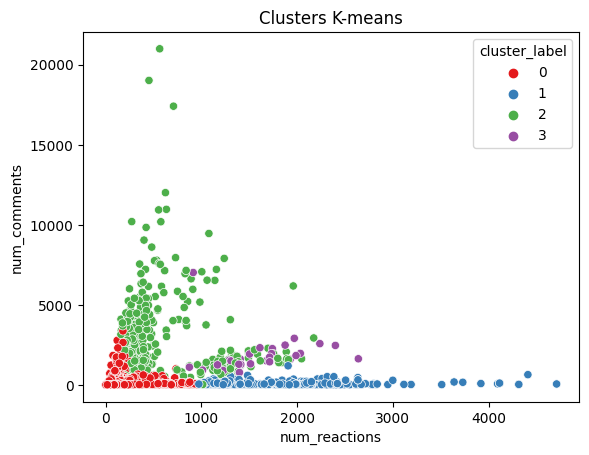

In [36]:
# Visualisation des groupes
sns.scatterplot(data=df, x='num_reactions', y='num_comments', hue='cluster_label', palette='Set1')
plt.title("Clusters K-means")
plt.show()

## Interpretation des clusters

In [37]:
# Interprétation des groupes
# Afficher les statistiques des clusters
cluster_stats = df.groupby('cluster_label')[df_numeric.columns].mean()
cluster_stats

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
cluster_label,,,,,,,,,
0,109.779374,74.045179,16.552203,102.821999,5.996648,0.522350,0.286718,0.112069,0.037516
1,1823.311828,61.333333,11.645161,1817.534946,3.104839,2.435484,0.198925,0.032258,0.005376
2,538.492105,2728.015789,391.144737,418.002632,107.578947,3.805263,5.400000,2.376316,1.313158
3,1522.617647,1718.500000,750.264706,1088.617647,298.205882,101.941176,29.058824,2.970588,1.823529


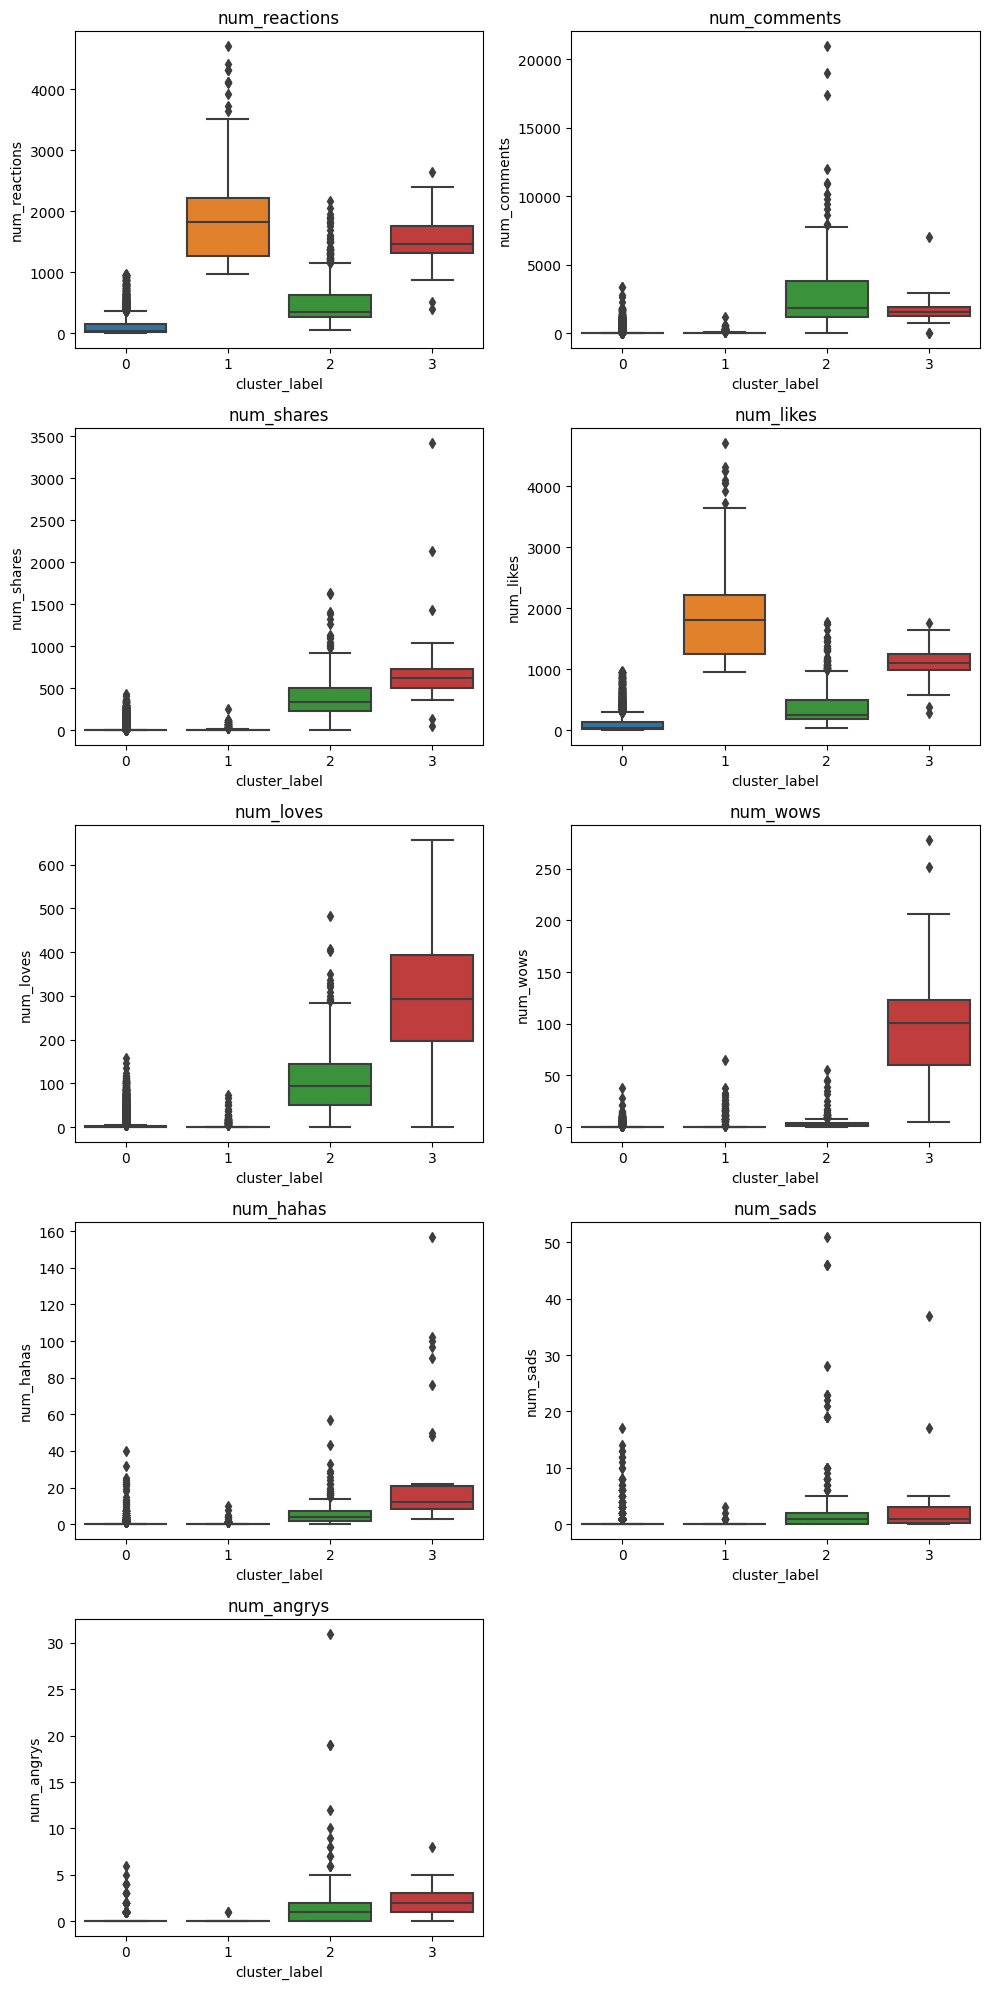

In [38]:
# Créer un boxplot pour chaque colonne numérique
num_cols = len(df_numeric.columns) # -1 pour exclure 'status_type'

# Nombre de lignes pour les sous-graphiques
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

plt.figure(figsize=(10, 4 * num_rows))
for i, column in enumerate(df_numeric.columns, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='cluster_label', y=column, data=df)
    plt.title(column)

plt.tight_layout()
plt.show()
